In [39]:
import pandas as pd
from matplotlib import pyplot as plt
from mongodb import DatabaseClient

In [2]:
client = DatabaseClient()
client.check_connection()

True

In [41]:
pipeline = [{"$project": {"title": 1}}]

result = list(client.collection.aggregate(pipeline))
result = [x["title"] for x in result if x["title"] is not None]
result = " ".join(result).replace(",", " ").split(" ")

<Axes: xlabel='word'>

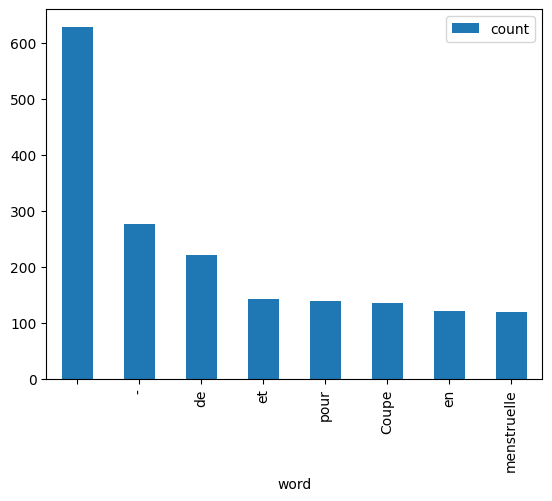

In [50]:
counts = pd.Series(result).value_counts().reset_index()
counts.columns = ["word", "count"]
counts = counts[counts["count"] > 100]
counts.plot(kind="bar", x="word", y="count")